# Predicting the likelihood of heart attacks
#### EDA Summary:
1. The dataset does not have NULL values in any column. It had one duplicate row that was removed from the dataset.
2. None of the continuous independent variables show high +ve or -ve correlation with each other.
3. Females (Sex=0) are more likely to have heart attacks than men.
4. Likelihood of heart attack increases with increase in age (40-55 risky age group) and lower old peak and upslope in exercise ST

#### Model Summary:
Random Forest gave me the best accuracy of 85.5% for this data. 

Random Forest is an emsemble modeling method that uses multiple decision trees using the Bagging technique to get better results. In bagging, the training set is split into subsets and used to train different decision trees. The average of these results is used to predict/ classify.

#### Next Steps:
Next steps that can be taken to improve the models and modelling process:
   1. Outlier removal
   2. Feature selection
   3. Hyperparameter Optimization 
   4. Implementing Pipeline to make the code more readable and reusable
   5. K-fold Cross-validation
   
#### Questions:
1. How to handle categorical variables that are encoded as numbers:
- Does the correlation plot even show any correlation for numeric categorical variables? (My guess: No. We would need to do ANOVA and Chi-sq tests)
- Do they need to be encoded? (My guess: Yes. Otherwise the model could give weights to the numbers. [Support Resource](https://developers.google.com/machine-learning/data-prep/transform/transform-categorical))
- If a categorical variable is Ordinal , is it okay to just give them 1,2,3... weights or use ordinal encoder? (This is something for me to look into)
    
    
2. If I didn't encode the categorical variables and the continuous variables (Age, chol) did not have a very high scale. Is it always a good practise to scale the numeric columns even if their range in 100s and some continuous variables have ranges in single digits?


3. What is the correct evaluation metric for this problem?
- Recall should be given the highest priority for this problem because in heart attack cases false negatives are a bigger risk than false positives. False positive would just mean more precautionary tests for patients whereas false negative could mean that their condition was overlooked
- Accuracy is a good metric for this problem to make sure that the models are performing at a certain level of correctness

#### Resources used:
1. Kaggle dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download&select=heart.csv
2. EDA resource: https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55
3. Outlier Removal: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba


## Exploratory Data Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Dataset: Metadata and import

*About this dataset*

1. Age : Age of the patient

2. Sex : Sex of the patient (1 = male, 0 = female)

3. exang: exercise induced angina (1 = yes; 0 = no)

4. cp : Chest Pain type chest pain type

- Value 0: asymptomatic
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain

5. trtbps : resting blood pressure (in mm Hg)

6. chol : cholestoral in mg/dl fetched via BMI sensor

7. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

8. rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

9. thalach : maximum heart rate achieved

10. oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)

11. slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

12. ca: The number of major vessels (0–3)

13. thal: A blood disorder called thalassemia 
- Value 0: NULL 
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)

14. target : 
- 0= less chance of heart attack 
- 1= more chance of heart attack

Understanding some variables from above.

**Slope:** Thus, a downsloping ST depression suggests the most extensive ischemia, while horizontal remains as the marker for a moderate process and an upsloping pattern indicates significant but smaller size. Of those with downsloping ST depression 39.9% had triple vessel disease, 18.9% double and 41.2% single vessel disease. [Resource](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6932726/#:~:text=Thus%2C%20a%20downsloping%20ST%20depression,and%2041.2%25%20single%20vessel%20disease.)

From the definitions of columns in the dataset, it seems like oldpeak and slope might be related. We should look at these two together.

In [5]:
df = pd.read_csv('heart.csv').drop_duplicates()

### Distribution of the data in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dict = {}
for column in list(df.columns):
    dict[column] = df[column].value_counts().shape[0]
    
print(pd.DataFrame(dict, index=['unique_count']).transpose())

          unique_count
age                 41
sex                  2
cp                   4
trtbps              49
chol               152
fbs                  2
restecg              3
thalachh            91
exng                 2
oldpeak             40
slp                  3
caa                  5
thall                4
output               2


Based on the data description, unique values in each column along with the finding that none of the columns have any Null values we have identified the categorical and continuous independent variables in the dataset. So I will create lists containing the independent variables of both types for use throughout our project

In [9]:
str_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


### EDA - Visualizations

I am creating a copy of the dataset to visualize with more information for the categorical variables

In [12]:
viz_data = df.copy(deep=True) # Any changes to copy will not be reflected in the original

Let us work on creating categorical columns

In [10]:
# For sex column
conditions = [viz_data.sex == 1, viz_data.sex == 0]
choices = ['Male', 'Female']
viz_data['sex'] = np.select(condlist= conditions, choicelist=choices)

# For chest pain (cp) column
conditions = [viz_data.cp == 1, viz_data.cp == 2, viz_data.cp == 3, viz_data.cp == 0 ]
choices = ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']
viz_data['cp'] = np.select(condlist= conditions, choicelist=choices)

# For slope during ST exercise
conditions = [viz_data.slp == 0, viz_data.slp == 1, viz_data.slp == 2 ]
choices = ['Downsloping', 'Flat', 'Upsloping']
viz_data['slp'] = np.select(condlist= conditions, choicelist=choices)

# For thallasemia
conditions = [viz_data.thall == 0, viz_data.thall == 1, viz_data.thall == 2, viz_data.thall == 3 ]
choices = ['None', 'Fixed Defect', 'Normal Flow', 'Reversible Defect']
viz_data['thall'] = np.select(condlist= conditions, choicelist=choices)


# For target variable
conditions = [viz_data.output==1, viz_data.output==0]
choices = ['Heart Attack', 'No Heart Attack']
viz_data['output'] = np.select(condlist= conditions, choicelist=choices)

In [11]:
viz_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,Non-anginal pain,145,233,1,0,150,0,2.3,Downsloping,0,Fixed Defect,Heart Attack
1,37,Male,Atypical angina,130,250,0,1,187,0,3.5,Downsloping,0,Normal Flow,Heart Attack
2,41,Female,Typical angina,130,204,0,0,172,0,1.4,Upsloping,0,Normal Flow,Heart Attack
3,56,Male,Typical angina,120,236,0,1,178,0,0.8,Upsloping,0,Normal Flow,Heart Attack
4,57,Female,Asymptomatic,120,354,0,1,163,1,0.6,Upsloping,0,Normal Flow,Heart Attack


Finally describing columns with continuous values

In [12]:
viz_data.describe()

,age,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,0.718543
std,9.04797,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,1.006748
min,29.00000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000


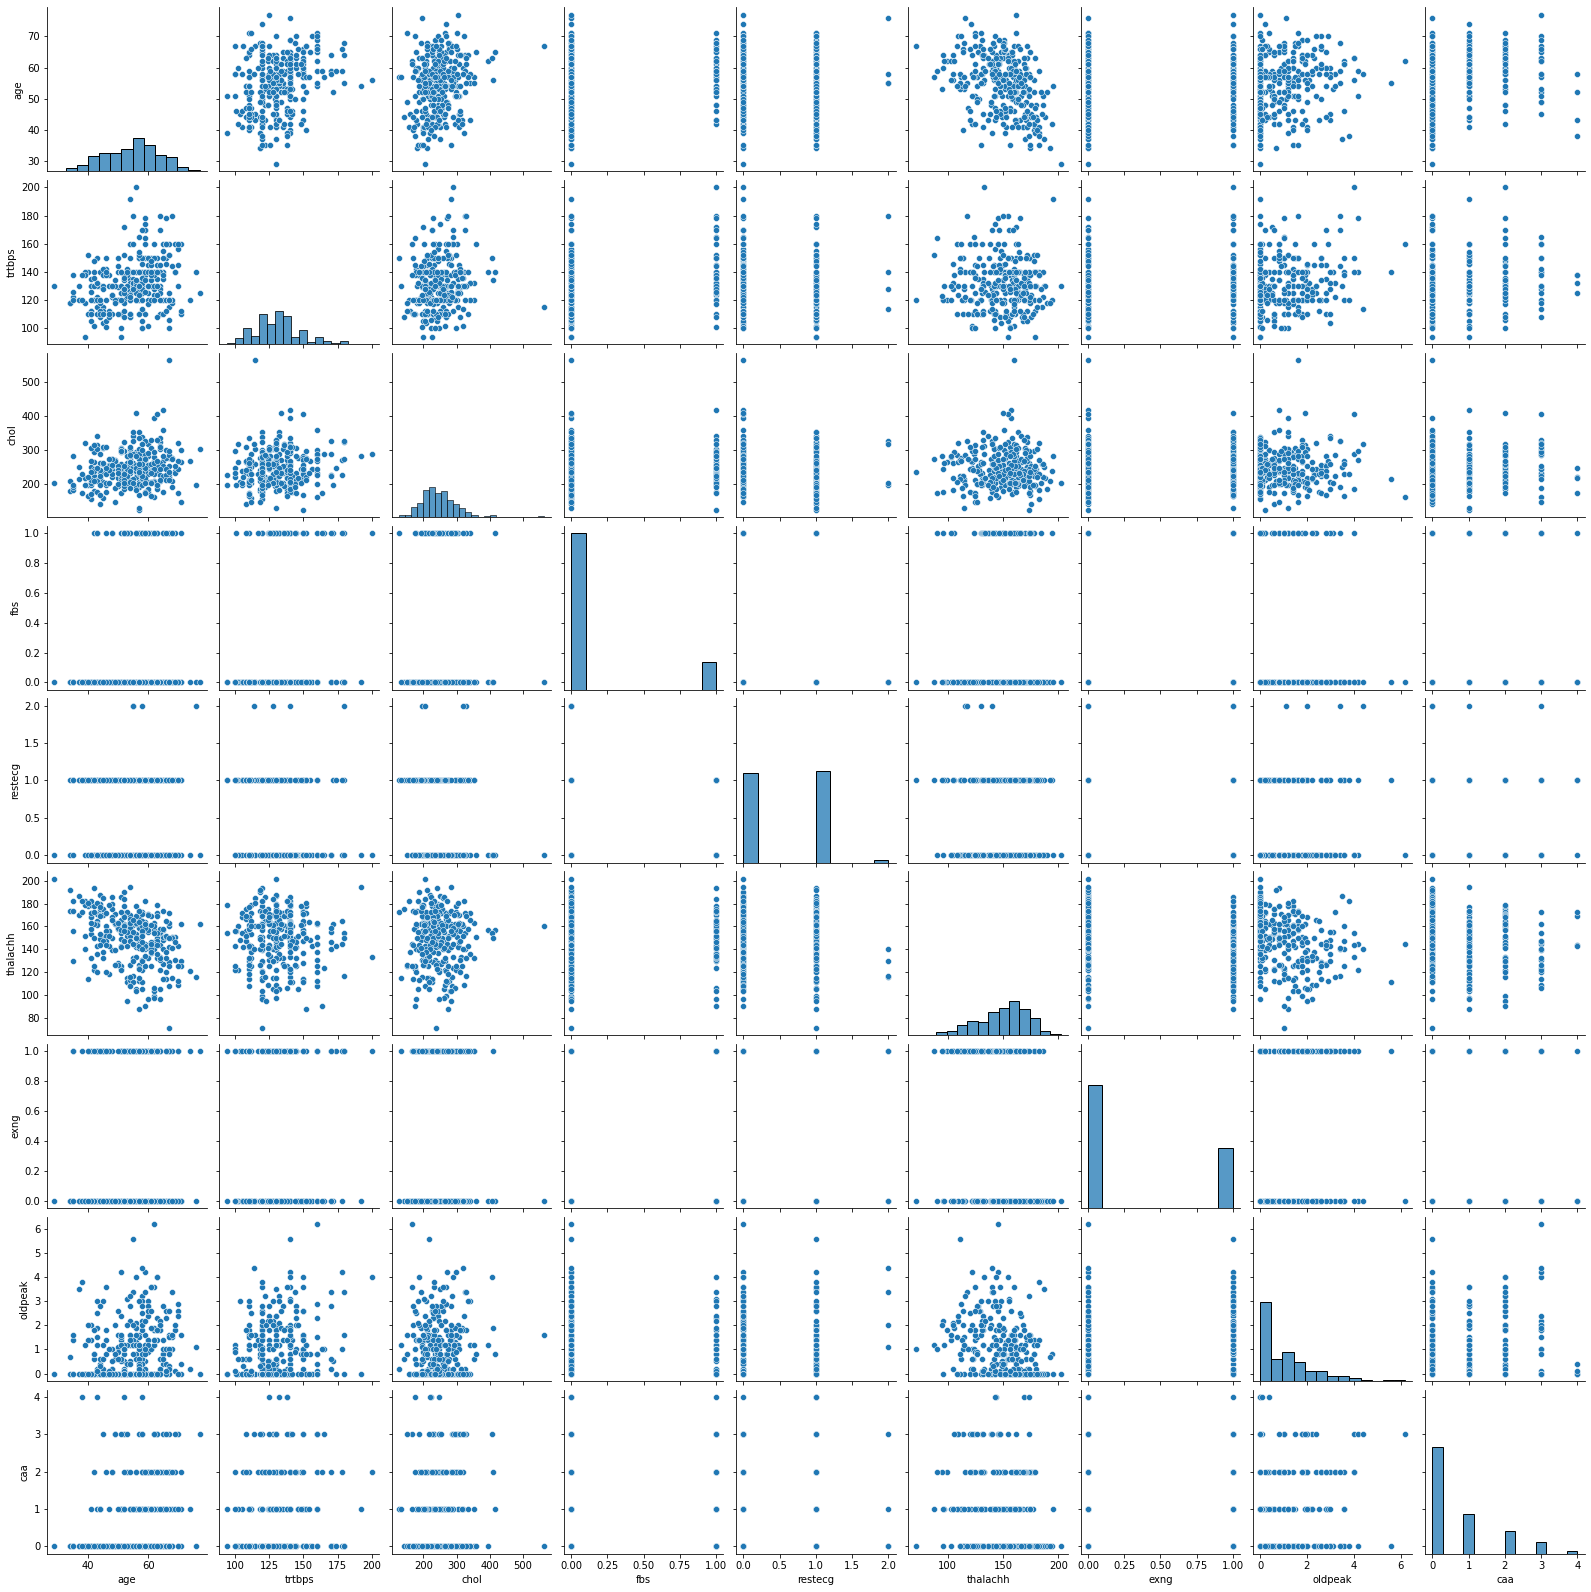

In [13]:
sns.pairplot(viz_data)

In [14]:
viz_data[num_cols].corr()

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


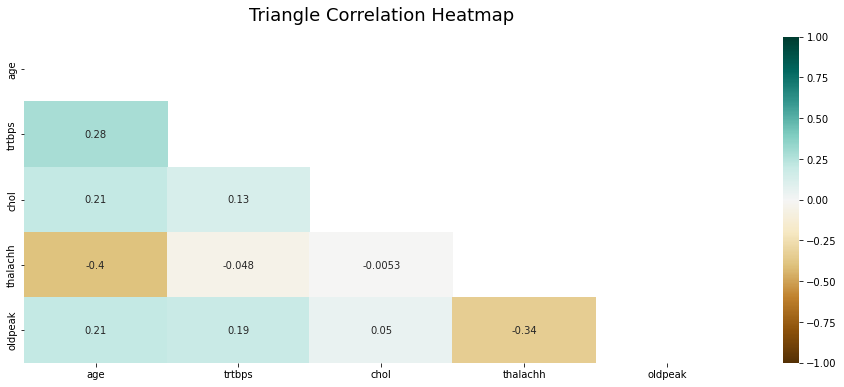

In [15]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(viz_data[num_cols].corr(), dtype=bool))
heatmap = sns.heatmap(viz_data[num_cols].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Looking at the chart above, none of the continuous independent variables have a high correlation with each other

Next, we will try to distribution of all variables with numeric values (categorical and continuous) as a relationship of all the other numeric variables in the dataset

Outlier detection in numeric columns

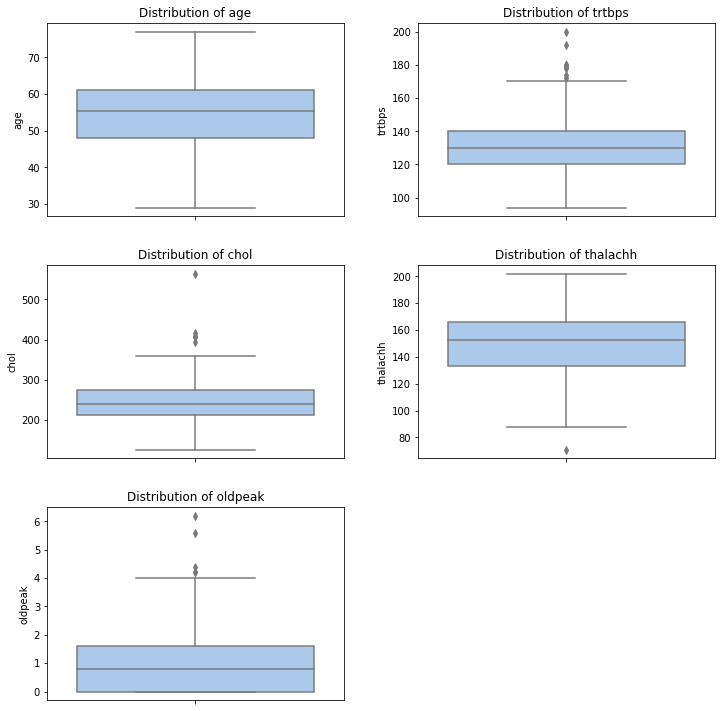

In [16]:
total_rows = 3
total_cols = 2
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(10, 10))
fig.tight_layout() 
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.25)

i = j = 0
for variable in num_cols:
    axs[i,j].set_title("Distribution of {}".format(variable))
    g = sns.boxplot(y=variable, data=viz_data, ax=axs[i][j], palette='pastel')
    j += 1
    if j >= total_cols:
        i += 1; j = 0
        
# Removing the last subplot as it is empty
axs[2,1].remove()

I skipped removing outliers in this version of modelling. Maybe a next step??

We see outliers in trtbps, chol, oldpeak. Let's remove outliers based on this information.

We cannot use stats.zscore for removal in this dataset because the dataset has both numeric and categorical values. So we will use IQR to do this.

In [17]:
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [18]:
# data_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# data_iqr.shape

I am also curious about the distribution of data in the dataset across different categories to understand which categories might have better predictions because they had more data points to train the models

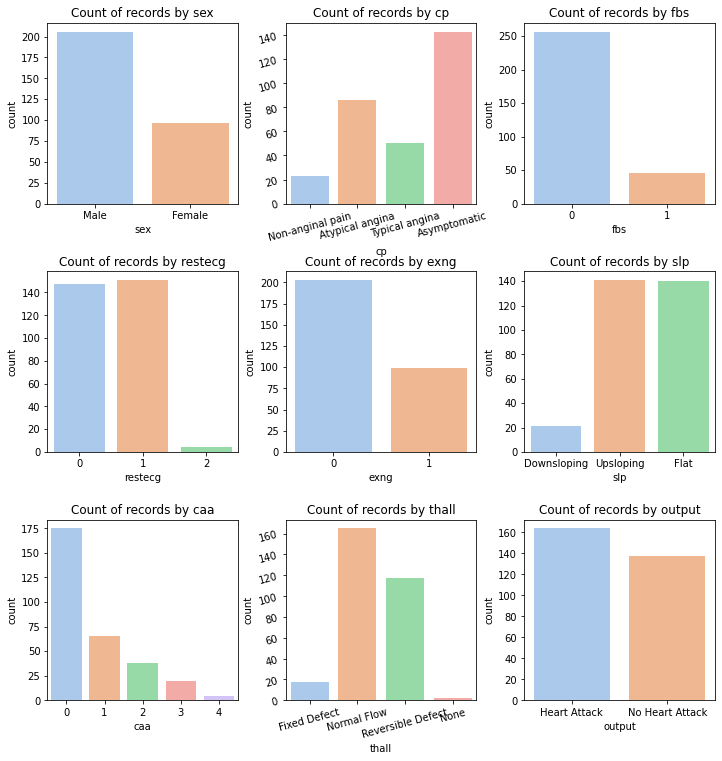

In [19]:
total_rows = 3
total_cols = 3
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(10, 10))
fig.tight_layout() 
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.375)

i = j = 0
for variable in str_cols:
    axs[i,j].set_title("Count of records by {}".format(variable))
    subplot = sns.countplot(data=viz_data,x=variable, ax=axs[i][j], palette='pastel')
    if variable=='cp' or variable=='thall':
        axs[i][j].tick_params(labelrotation=15) # Rotating labels on X-axis by 15 degrees
    j += 1
    if j >= total_cols:
        i += 1; j = 0


#### Relationship between individual independent variables with the output variable

We will start with looking at the likelihood of heart attacks based on different categories within each categorical variable.

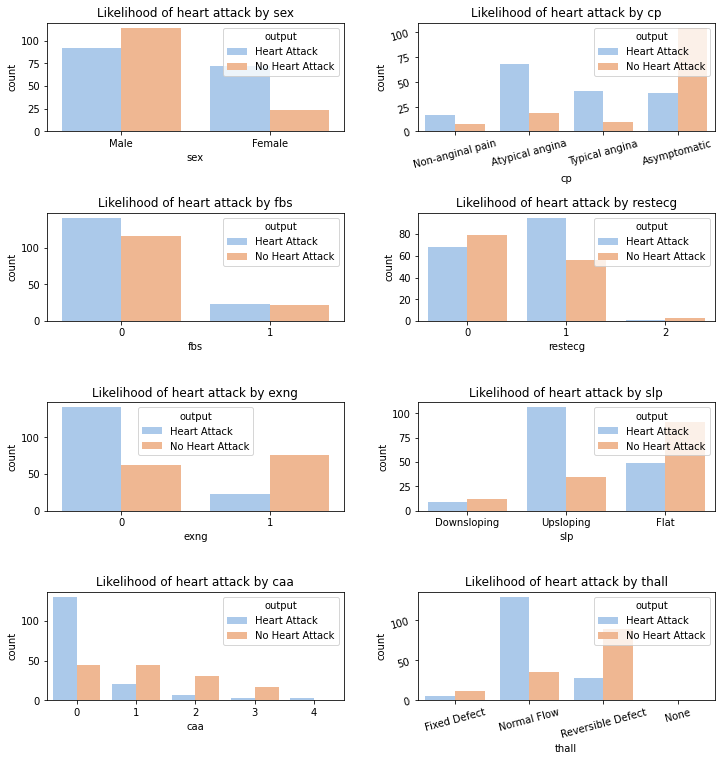

In [20]:
total_rows = 4
total_cols = 2
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(10, 10))
fig.tight_layout() 
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.75)

i = j = 0
for variable in str_cols:
    if variable != 'output':
        axs[i,j].set_title("Likelihood of heart attack by {}".format(variable)) 
        subplot = sns.countplot(x=variable, hue="output", data=viz_data, palette='pastel', ax=axs[i,j])
        
        if variable=='cp' or variable=='thall':
            axs[i][j].tick_params(labelrotation=15) # Rotating labels on X-axis by 15 degrees
        
        j += 1
    if j >= total_cols:
        i += 1; j = 0


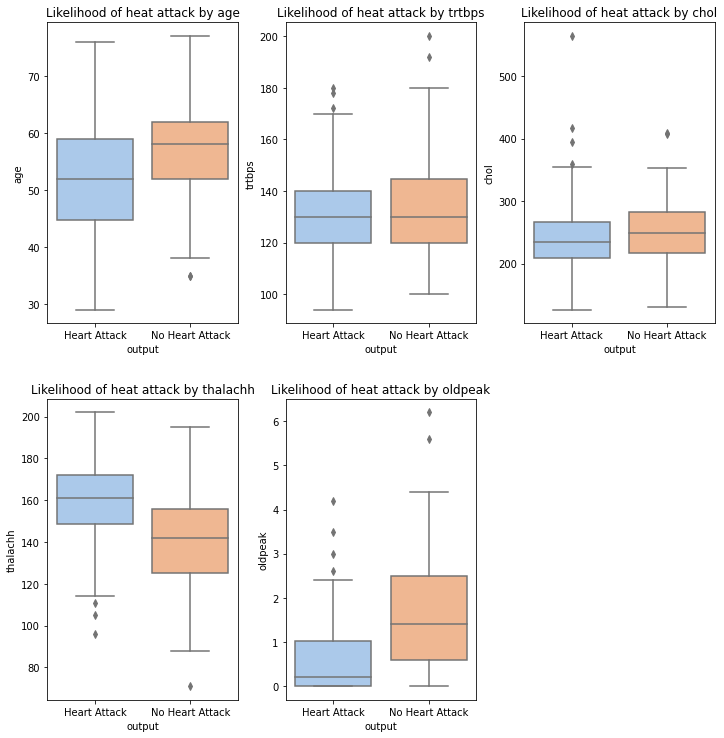

In [21]:
total_rows = 2
total_cols = 3
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(10, 10))
fig.tight_layout() 
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.25)


plt.xticks(rotation=90) # Rotating labels on X-axis by 90 degrees
i = j = 0
for variable in num_cols:
    axs[i,j].set_title("Likelihood of heat attack by {}".format(variable))
    g = sns.boxplot(y=variable, x="output", data=viz_data, ax=axs[i][j], palette='pastel')
#     g.set(yscale="log")
    j += 1
    if j >= total_cols:
        i += 1; j = 0
        
# Removing the last subplot as it is empty
axs[1,2].remove()

Based on the boxplots above we can make assumptions about the bigger population if the mean of one group is considerably different from the mean of another group within a category:
1. The mean age of people getting heart attacks is around 50-55
2. The maximum heart rate for people getting heart attacks is around 160
4. Very low oldpeak value during exercise ST is an indicator of a higher likelihood of heart attacks

#### Relationship between multiple independent variable groups with the output variable

**A. Likelihood of heart attacks based on age and sex**

We will start by looking at the count of values within different categories 

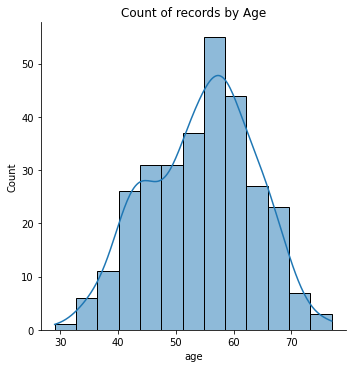

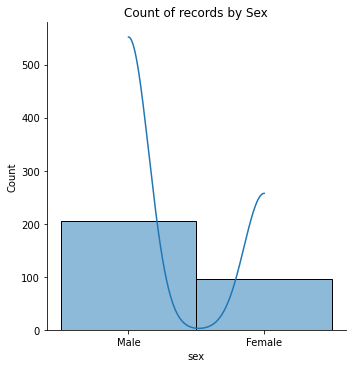

In [22]:
sns.displot(data=viz_data, x='age', kde=True).set(title='Count of records by Age')
sns.displot(data=viz_data, x='sex', kde=True).set(title='Count of records by Sex')

There is not enough data to compare the two sexes because the data sample for females is almost half of that of males. However, we can look into the patterns of data within each sex category.

There seems to be enough data for people between the age of 45 to 65 to make conclusions. Let's begin with analyzing age first

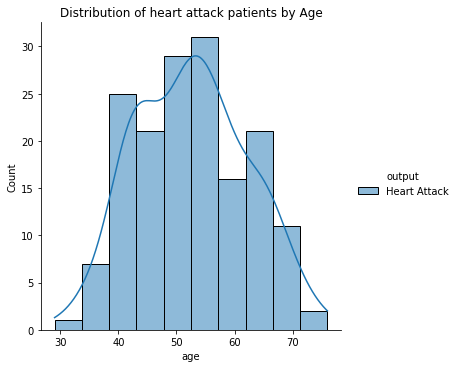

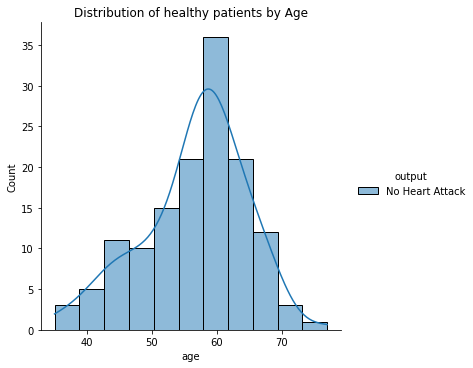

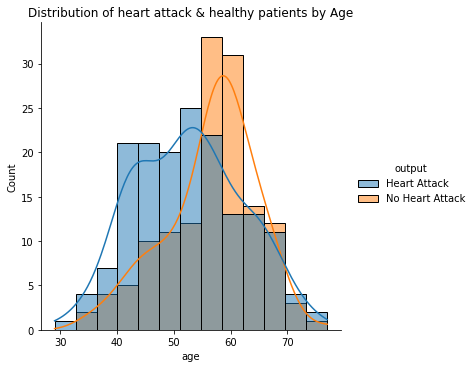

In [23]:
sns.displot(data=viz_data[viz_data['output']=='Heart Attack'], x='age', hue='output', kde=True).\
    set(title='Distribution of heart attack patients by Age')


sns.displot(data=viz_data[viz_data['output']=='No Heart Attack'], x='age', hue='output', kde=True).\
    set(title='Distribution of healthy patients by Age')

sns.displot(data=viz_data, x='age', hue='output', kde=True).\
    set(title='Distribution of heart attack & healthy patients by Age')

<AxesSubplot:xlabel='age', ylabel='chol'>

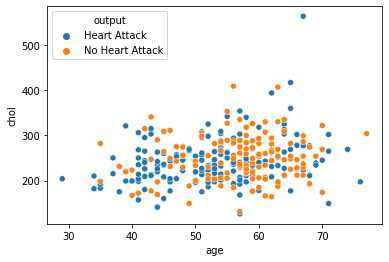

In [24]:
sns.scatterplot(data=viz_data, x="age", y="chol", hue='output')

Conclusion: It seems that heart attacks are more likely to happen as age increases. According to this dataset, the age between 40 - 55 is the most risky age group. I also noticed that heart attacks are more likely for people below 60 and for people with cholestrol over 300.

I added Kernel density estimate to these graphs to extrapolate information about the population using this finite sample. [[Explanation of KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation)]

<AxesSubplot:xlabel='sex', ylabel='age'>

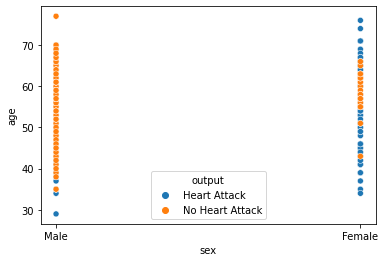

In [25]:
sns.scatterplot(data=viz_data, x='sex', y='age', hue='output')

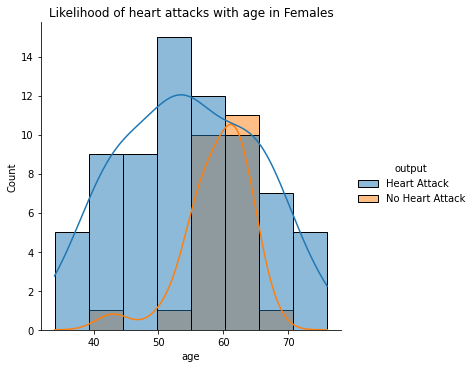

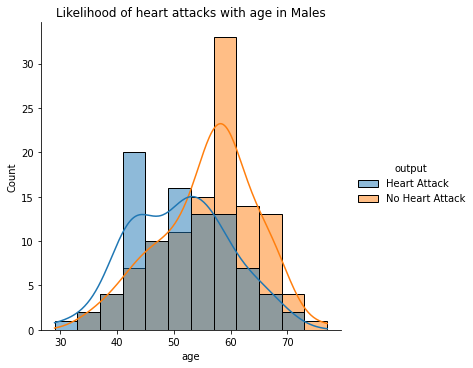

In [26]:

sns.displot(data=viz_data[viz_data['sex']=='Female'], x='age', hue='output', kde=True)\
.set(title='Likelihood of heart attacks with age in Females')


sns.displot(data=viz_data[viz_data['sex']=='Male'], x='age', hue='output', kde=True)\
.set(title='Likelihood of heart attacks with age in Males')

Based on this dataset, females are more likely to heart attacks than males.

<AxesSubplot:xlabel='thalachh', ylabel='age'>

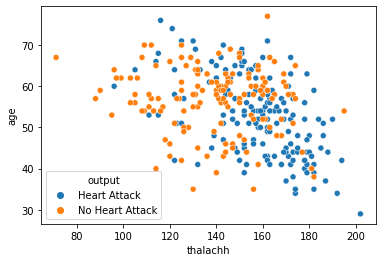

In [27]:
sns.scatterplot(data=viz_data, x='thalachh', y='age', hue='output')

**B. Exercise related variables**

I am curious about all the exercise related variables and their inter-relationships along with their relationship with the output variable.

I started with looking into Old Peak and Slope because they are both related to exercise ST. And then looked into exercise induce angina.

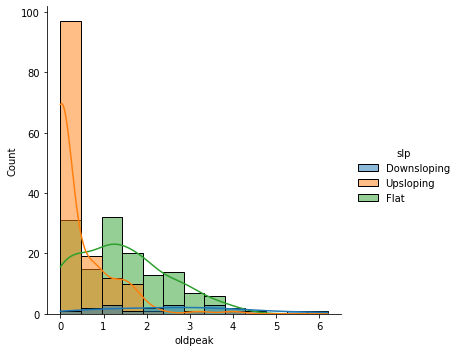

In [28]:
# Relationship between Old Peak and slope

sns.displot(data=viz_data, x='oldpeak', hue='slp', kde=True)

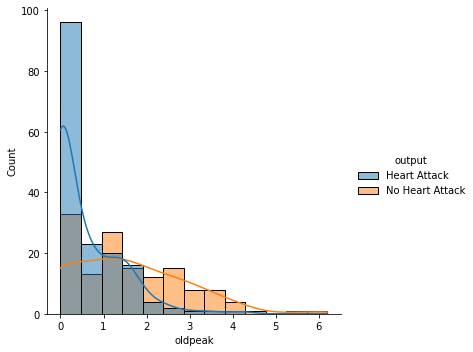

In [29]:
sns.displot(data=viz_data, x='oldpeak', hue='output', kde=True)

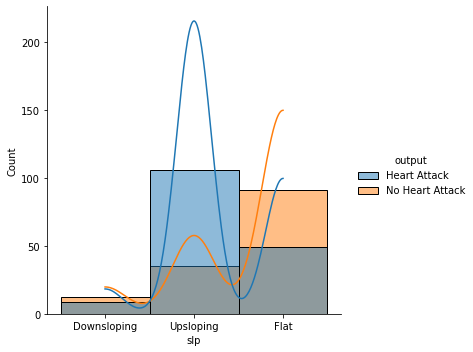

In [30]:
sns.displot(data=viz_data, x='slp', hue='output', kde=True)

<AxesSubplot:xlabel='oldpeak', ylabel='exng'>

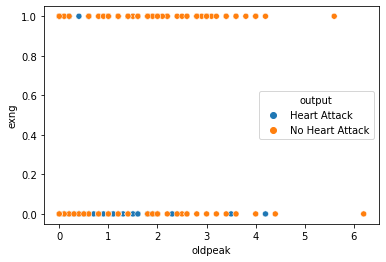

In [31]:
sns.scatterplot(data=viz_data, x='oldpeak', y='exng', hue='output')

There isn't enough data for Downsloping during exercise. But we can see that Upsloping is more prevalent for patients with very low oldpeak. Upsloping of ST also shows a very high likelihood of heart-attack.


Also, Heart attack seems to be more likely for people with low oldpeak but no exercise related angina.The exang=0 conclusion might also have happened because it has more data points than exang = 1. Needs statistical tests ore more ata to allow normal population extrapolation.

**C. Cholestrol, Blood Pressure and Blood Sugar**

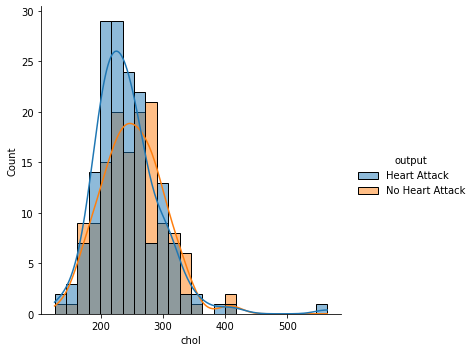

In [32]:
sns.displot(data=viz_data, x='chol', hue='output', kde=True)

<AxesSubplot:xlabel='trtbps', ylabel='chol'>

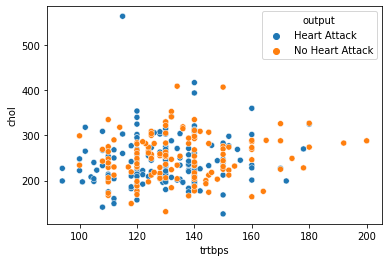

In [33]:
sns.scatterplot(data=viz_data, x="trtbps", y="chol", hue="output")

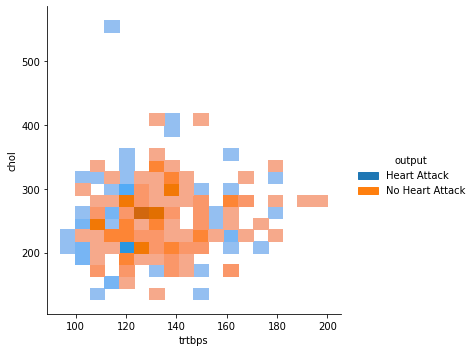

In [34]:
sns.displot(data=viz_data, x="trtbps", y="chol", hue="output")

Very low blood pressure or high cholestrol can be a cause of heart attack

## Classification Modeling

### 1. Preparing the data for modeling

#### A.  Splitting data into training and testing

First I want to make the dataframe more readable before transformations to track back categorical encoding 

In [13]:
model_data = df.copy(deep=True)

# For chest pain (cp) column
conditions = [model_data.cp == 0, model_data.cp == 1, model_data.cp == 2, model_data.cp == 3]
choices = ['Asymptomatic', 'Typical angina', 'Atypical angina', 'Non-anginal pain']
model_data['cp'] = np.select(condlist= conditions, choicelist=choices)

# For slope during ST exercise
conditions = [model_data.slp == 0, model_data.slp == 1, model_data.slp == 2 ]
choices = ['Downsloping', 'Flat', 'Upsloping']
model_data['slp'] = np.select(condlist= conditions, choicelist=choices)

# For thallasemia
conditions = [model_data.thall == 0, model_data.thall == 1, model_data.thall == 2, model_data.thall == 3 ]
choices = ['None', 'Fixed Defect', 'Normal Flow', 'Reversible Defect']
model_data['thall'] = np.select(condlist= conditions, choicelist=choices)

In [14]:
model_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,Non-anginal pain,145,233,1,0,150,0,2.3,Downsloping,0,Fixed Defect,1
1,37,1,Atypical angina,130,250,0,1,187,0,3.5,Downsloping,0,Normal Flow,1
2,41,0,Typical angina,130,204,0,0,172,0,1.4,Upsloping,0,Normal Flow,1
3,56,1,Typical angina,120,236,0,1,178,0,0.8,Upsloping,0,Normal Flow,1
4,57,0,Asymptomatic,120,354,0,1,163,1,0.6,Upsloping,0,Normal Flow,1


I re-arranged the columns to make sure that all columns that need to be encoded will be at the end of the dependent variable dataset (X) once we divide model_data into X & y.

In [15]:
model_data = model_data[['sex', 'fbs', 'restecg', 'exng', 'caa', 'cp', 'slp', 'thall', 
                        'age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']]

In [16]:
model_data.columns

Index(['sex', 'fbs', 'restecg', 'exng', 'caa', 'cp', 'slp', 'thall', 'age',
       'trtbps', 'chol', 'thalachh', 'oldpeak', 'output'],
      dtype='object')

In [17]:
X = model_data.iloc[:,:-1].values
y = model_data.iloc[:,-1].values

In [18]:
X[0:10]

array([[1, 1, 0, 0, 0, 'Non-anginal pain', 'Downsloping', 'Fixed Defect',
        63, 145, 233, 150, 2.3],
       [1, 0, 1, 0, 0, 'Atypical angina', 'Downsloping', 'Normal Flow',
        37, 130, 250, 187, 3.5],
       [0, 0, 0, 0, 0, 'Typical angina', 'Upsloping', 'Normal Flow', 41,
        130, 204, 172, 1.4],
       [1, 0, 1, 0, 0, 'Typical angina', 'Upsloping', 'Normal Flow', 56,
        120, 236, 178, 0.8],
       [0, 0, 1, 1, 0, 'Asymptomatic', 'Upsloping', 'Normal Flow', 57,
        120, 354, 163, 0.6],
       [1, 0, 1, 0, 0, 'Asymptomatic', 'Flat', 'Fixed Defect', 57, 140,
        192, 148, 0.4],
       [0, 0, 0, 0, 0, 'Typical angina', 'Flat', 'Normal Flow', 56, 140,
        294, 153, 1.3],
       [1, 0, 1, 0, 0, 'Typical angina', 'Upsloping',
        'Reversible Defect', 44, 120, 263, 173, 0.0],
       [1, 1, 1, 0, 0, 'Atypical angina', 'Upsloping',
        'Reversible Defect', 52, 172, 199, 162, 0.5],
       [1, 0, 1, 0, 0, 'Atypical angina', 'Upsloping', 'Normal Flow', 57,


#### B. Encoding the categorical data

The categorical columns need to be encoded in order for the models to preform their best. Below is a list of all the categorical columns and a plan for their encoding:
1. Sex, Fast blood sugar (fbs), Exercise induced angina (exng) - These columns already contain just 0 & 1 so we don't need to encode it.
2. Chest pain (cp), thall, slope (slp) - These variables need to be encoded and treated for dummy variable trap.
3. restecg - This categorical variable is ordinal in nature and is already has those values in-built

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5,6,7])], remainder='passthrough')

X = pd.DataFrame(ct.fit_transform(X)) # Encoded variables appear at the beginning of the array

X.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,63,145,233,150,2.3
1,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,37,130,250,187,3.5
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,41,130,204,172,1.4
3,0,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,56,120,236,178,0.8
4,1,0,0,0,0,0,1,0,0,1,...,0,0,1,1,0,57,120,354,163,0.6


In [20]:
ran = pd.merge(X[:11], model_data[['cp', 'slp', 'thall']], left_index=True, right_index=True)
ran = ran[[0,1,2,3,4,5,6,7,8,9,10,'cp', 'slp', 'thall']]
ran.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,10,cp,slp,thall
0,0,0,1,0,1,0,0,1,0,0,0,Non-anginal pain,Downsloping,Fixed Defect
1,0,1,0,0,1,0,0,0,0,1,0,Atypical angina,Downsloping,Normal Flow
2,0,0,0,1,0,0,1,0,0,1,0,Typical angina,Upsloping,Normal Flow
4,1,0,0,0,0,0,1,0,0,1,0,Asymptomatic,Upsloping,Normal Flow
5,1,0,0,0,0,1,0,1,0,0,0,Asymptomatic,Flat,Fixed Defect
6,0,0,0,1,0,1,0,0,0,1,0,Typical angina,Flat,Normal Flow
7,0,0,0,1,0,0,1,0,0,0,1,Typical angina,Upsloping,Reversible Defect
8,0,1,0,0,0,0,1,0,0,0,1,Atypical angina,Upsloping,Reversible Defect
9,0,1,0,0,0,0,1,0,0,1,0,Atypical angina,Upsloping,Normal Flow


For record-keeping, this was the order of dummy variable column values

A. cp
- Asmptomatic - Col 0
- Atypical Angina - Col 1
- Non-anginal angina - Col 2
- Typical Angina - Col 3 (Dropping this column)

B. slp
- Downslope - Col 4
- Flat - Col 5
- Upslope - Col 6 (Dropping this column)

C. Thall
- Fixed Defect - Col 7
- Reversible Defect - Col 8
- Normal - Col 9
- Reversible defect - Column 10 (Dropping this column)

In [21]:
# Dropping all the extra dummy variable columns from X to avoid dummy variable trap
X.drop(X.columns[[3, 6, 10]],axis = 1, inplace=True)

# Converting X back into an array for further processing
X=np.array(X)

Now let's split the input and output arrays into Training and Testing datasets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.25)

In [23]:
X_train_wo_scale, X_test_wo_scale, y_train_wo_scale, y_test_wo_scale = \
    train_test_split(X, y,random_state=0, test_size=0.25)

#### C. Feature scaling
Next we will scale the continuous variables. For this project I am using the Standard Scaler library. I will fit the Scaler using X_train and then use it to transform both X_train and X_test.

In [24]:
X_train[0:10]

array([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 0, 0, 1, 2, 60, 130,
        206, 132, 2.4],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 0, 1, 1, 2, 53, 123,
        282, 95, 2.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0, 0, 0, 0, 54, 150,
        232, 165, 1.6],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1, 0, 0, 0, 0, 59, 178,
        270, 145, 4.2],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 0, 0, 0, 2, 62, 140,
        268, 160, 3.6],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1, 0, 0, 0, 3, 70, 130,
        322, 109, 2.4],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 0, 0, 0, 1, 44, 112,
        290, 153, 0.0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1, 0, 0, 1, 3, 67, 160,
        286, 108, 1.5],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 2, 60, 150,
        258, 157, 2.6],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 0, 0, 0, 3, 69, 140,
        254, 146, 2.0]], dtype=object)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# This way we fit the scaler and transform the Training dataset in one step
X_train[:,12:] = scaler.fit_transform(X_train[:,12:])

In [26]:
X_train[0:3]

array([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 0, 0, 1,
        1.2550717528617086, 0.5907330770102213, -0.10800155520196442,
        -0.7592545511938551, -0.7229316622752894, 1.0701071078342905],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 0, 1, 1,
        1.2550717528617086, -0.17970363183575594, -0.5044248970337674,
        0.6625679707539924, -2.288222848175334, 0.7380175693920665],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0, 0, 0,
        -0.7146936370462507, -0.06964124485775919, 1.0246365643174724,
        -0.2728415831590651, 0.6731388548788045, 0.4059280309498425]],
      dtype=object)

In [27]:
# Now we transform X_test using the Scaler that has learnt from X_train
X_test[:,12:] = scaler.transform(X_test[:,12:])

In [28]:
X_train

array([[1.0, 0.0, 0.0, ..., -0.7592545511938551, -0.7229316622752894,
        1.0701071078342905],
       [1.0, 0.0, 0.0, ..., 0.6625679707539924, -2.288222848175334,
        0.7380175693920665],
       [0.0, 1.0, 0.0, ..., -0.2728415831590651, 0.6731388548788045,
        0.4059280309498425],
       ...,
       [0.0, 0.0, 1.0, ..., -1.00246103521125, 0.5462233533193415,
        0.6549951847815104],
       [0.0, 1.0, 0.0, ..., 0.19486319379746367, 0.2923923502004153,
        -0.922430122819054],
       [0.0, 1.0, 0.0, ..., -0.4225071117851543, 1.0115801923707062,
        1.7342861847187387]], dtype=object)

### 2. Trying out different classification models

#### A. Logistic Regression

##### Scikit Learn Model

In [51]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

Resolved above issue through this link: https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

In [52]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
log_classifier.fit(X_train, y_train)

y_pred = log_classifier.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25  8]
 [ 5 38]]


0.8289473684210527

In [54]:
# Recall
cm[0][0]/(cm[0][0]+cm[1][0])

0.8333333333333334

In [55]:
# Let's look at cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_classifier, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.7826087  0.86956522 0.86956522 0.82608696 0.91304348 0.82608696
 0.90909091 0.81818182 0.95454545 0.86363636]


In [56]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.782608695652174, 0.8632411067193676, 0.9545454545454546)

In [57]:
parameters = log_classifier.coef_
parameters

array([[-0.96522027,  0.38159199,  0.58355288,  0.0232746 , -0.75040677,
         0.64352106, -0.07458798,  1.24715277, -1.51682852, -0.0670187 ,
        -0.01427391, -0.39345359, -0.97264019,  0.15461263, -0.26427394,
        -0.19660083,  0.45941056, -0.55558466]])

In [58]:
X_test[:,1].squeeze

<function ndarray.squeeze>

<AxesSubplot:>

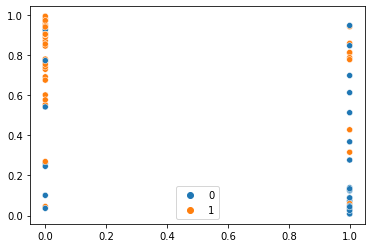

In [59]:
# Now let's visually try to understand the relationship between Asymptotic chest pain with the prediction
x_test_view = X_test[:,0].squeeze()

y_prob = log_classifier.predict_proba(X_test)
sns.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)

In [60]:
log_classifier.predict_proba(X_test[1:10])
# Column 0: Probablity of Class 0 (no heart attack)
# Column 1: Probablity of Class 1 (heart attack)

array([[0.44688037, 0.55311963],
       [0.73971383, 0.26028617],
       [0.86839931, 0.13160069],
       [0.95501011, 0.04498989],
       [0.95654305, 0.04345695],
       [0.92645167, 0.07354833],
       [0.86120732, 0.13879268],
       [0.97329612, 0.02670388],
       [0.96804216, 0.03195784]])

In [61]:
log_classifier2 = LogisticRegression(random_state = 0, penalty='l2', solver='lbfgs', max_iter=100, C=1)
log_classifier2.fit(X_train, y_train)

y_pred2 = log_classifier2.predict(X_test)

In [62]:
print(confusion_matrix(y_test, y_pred2))
accuracy_score(y_test, y_pred2)

[[25  8]
 [ 5 38]]


0.8289473684210527

In [63]:
# Let's look at cross-validation
scores2 = cross_val_score(log_classifier2, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores2)

Cross-Validation Accuracy Scores [0.7826087  0.86956522 0.86956522 0.82608696 0.91304348 0.82608696
 0.90909091 0.81818182 0.95454545 0.86363636]


In [65]:
# RFE stands for Recursive feature selection 
from sklearn.feature_selection import RFE
selector = RFE(log_classifier, step=1)
selector.fit(X_train, y_train)

# Ranking of importance of feature. 1 being the most important feature, 2 being the second important feature and so on
print("\nRanking of features is: {}".format(selector.ranking_))

selected_features_indices = selector.support_

print("\nSelected Indices are: {}".format(selected_features_indices))

X_train_subset = X_train[:selected_features_indices]
print("\nSubset of X_train: {}".format(X_train_subset))


Ranking of features is: [ 1  2  1  9  1  1  7  1  1  8 10  1  1  6  4  5  3  1]

Selected Indices are: [ True False  True False  True  True False  True  True False False  True
  True False False False False  True]


TypeError: only integer scalar arrays can be converted to a scalar index

##### Using statsmodel package


Questions:
1. Do statsmodels take care of feature scaling?
2. 

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

In [60]:
# Creating copy of model data for using statsmodels package
model_data2= model_data.copy(deep=True)
model_data2.dropna(inplace=True)

To fit most of the models covered by statsmodels, you will need to create two design matrices. The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.). The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.).

The patsy module provides a convenient function to prepare design matrices using R-like formulas. You can find more information here.

We use patsy’s dmatrices function to create design matrices:

In [61]:
y2, X2 = dmatrices('output ~ sex + fbs + restecg + exng + caa + cp + slp + thall + age + trtbps + chol+ thalachh + oldpeak'\
                 , data=model_data2, return_type='dataframe')


In [62]:
X2[1:3]

,Intercept,cp[T.Atypical angina],cp[T.Non-anginal pain],cp[T.Typical angina],slp[T.Flat],slp[T.Upsloping],thall[T.None],thall[T.Normal Flow],thall[T.Reversible Defect],sex,fbs,restecg,exng,caa,age,trtbps,chol,thalachh,oldpeak
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,37.0,130.0,250.0,187.0,3.5
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,130.0,204.0,172.0,1.4


In [63]:
y2

,output
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
298,0.0
299,0.0
300,0.0
301,0.0


In [64]:
# log_statsm = smf.logit(formula='output ~ sex + fbs + restecg + exng + caa + cp + slp + thall + age + trtbps + chol+ thalachh + oldpeak', data=model_data).fit()
log_statsm = sm.Logit(endog=y2, exog=X2).fit()
    

Optimization terminated successfully.
         Current function value: 0.333039
         Iterations 7


In [65]:
log_statsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  302
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           18
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.5169
Time:                        20:45:17   Log-Likelihood:                -100.58
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 8.693e-36
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.8782      2.744      1.049      0.294      -2.500       8.256
cp[T.Atypical angina]          1.9107      0.479      3.990      0.000       0.972       2.849
cp[T.Non-anginal pain]         2.0187      0.650      3.106      0.002       0.745       3.293
cp[T.Typical angina]           0.9850      0.565      1.744      0.081      -0.122       2.092
slp[T.Flat]                   -0.7198      0.857     -0.840      0.401      -2.400       0.960
slp[T.Upsloping]               0.2194      0.932      0.235      0.814      -1.607       2.046
thall[T.None]                 -1.8226      2.374     -0.768      0.443      -6.476       2.831
thall[T.Normal Flow]           0.0153      0.769      0.020      0.984      -1.492       1.523
thall[T.Reversible Defect]    -1.3400      0.758     -1.769      0.077      -2.825       0.145
sex                           -1.4923      0.516     -2.890      0.004      -2.505      -0.480
fbs                            0.2217      0.570      0.389      0.697      -0.896       1.339
restecg                        0.4926      0.360      1.367      0.171      -0.213       1.199
exng                          -0.7717      0.426     -1.810      0.070      -1.607       0.064
caa                           -0.8823      0.214     -4.118      0.000      -1.302      -0.462
age                            0.0024      0.024      0.102      0.919      -0.044       0.049
trtbps                        -0.0184      0.011     -1.739      0.082      -0.039       0.002
chol                          -0.0043      0.004     -1.098      0.272      -0.012       0.003
thalachh                       0.0176      0.011      1.642      0.101      -0.003       0.039
oldpeak                       -0.4901      0.224     -2.187      0.029      -0.929      -0.051
==============================================================================================
"""

Let's choose the attributes with p<0.05 because only those have a statistically significant effect on the log odds of heart attack. Those variables are- Atypical angina cp, Non-Anginal pain cp, sex, caa, oldpeak

Interpretation of some variables:

1. Chest Pain: Having Atypical Angina instead of having asymptomatic chest pain, increases the log-odds of having heart attack (v/s no heart attack) by 1.9
2. Chest Pain: Having Non-Anginal pain instead of having asymptomatic chest pain, increases the log-odds of having heart attack (v/s no heart attack) by 2.02
3. Sex: Being a male reduces the log odds of getting a heart attack by 1.5
4. caa - One unit increase in caa decreases the log odds of a heart attack by 0.88



**Q. The intercept seems to be statistically insignificant in the summary, what does that mean and should it be removed?**

For any model (OLS, Logistic Regression, Linear or Nonlinear), a model with no response assumes that if all predictors are zero then the output of the model is zero.

Here are the use cases where intercept can be removed if it is insignificant in a Linear model:
1. If the nature of the model is to assume that when all predictors are zero, the output should be zero then it is okay to remove an insignificant intercept
2. If the values of predictors are very far from the origin and the model is extrapolated to find intercept.

Here are the use cases where intercept should be used even if insignificant:
1. When the assumption isn't to predict zero for predictors are zero or close to zero.
2. Intercept is used to reduce noise in the model so it might be good to have it as a cushion to help with model's predictions
3. The model might have too many regressors and have collinearity and/or other problems. Sometimes it helps to drop attributes and look at the new intercept.

Source: http://support.sas.com/kb/23/136.html#:~:text=So%2C%20a%20highly%20significant%20intercept,the%20predictors%20are%20all%20zero.
https://www.researchgate.net/post/In_multiple_regression_if_the_constant_is_not_significant_but_the_other_variables_are_in_the_coefficient_table_what_does_this_mean2
https://stats.stackexchange.com/questions/160628/linear-regression-intercept-isnt-significant

Decision on Intercept-: 
I want to keep the intercept term because:
1. I don't want my model to predict no heart attack if all predictors are zero as for me False Positives are less risky than getting False Negatives 
2. I want to make my model smaller using only statistically significant attributes.

In [66]:
log_statsm2 = smf.logit(formula='output ~ sex + caa + cp + oldpeak', data=model_data).fit()
log_statsm2.summary()

Optimization terminated successfully.
         Current function value: 0.409257
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  302
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.4064
Time:                        20:45:18   Log-Likelihood:                -123.60
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 6.555e-34
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.4553      0.389      3.738      0.000       0.692       2.218
cp[T.Atypical angina]      2.3629      0.407      5.801      0.000       1.565       3.161
cp[T.Non-anginal pain]     2.3105      0.584      3.955      0.000       1.166       3.455
cp[T.Typical angina]       1.7590      0.467      3.766      0.000       0.844       2.674
sex                       -1.4027      0.377     -3.719      0.000      -2.142      -0.663
caa                       -0.7916      0.172     -4.592      0.000      -1.129      -0.454
oldpeak                   -0.8483      0.176     -4.831      0.000      -1.192      -0.504
==========================================================================================
"""

How to interpret p > |z|


The value of 0.000 in the P>|z| column for the attributes shows that the effect of each attribute on Outcome is statistically significant at conventional levels of significance. Thus, we can have confidence that the relationship between each of these independent attributes and heart attack observed in this dataset is unlikely to be solely attributable to sampling error. The values in the `[0.025 and 0.975]` columns provide the 95% confidence interval for the regression weight for each independent attribute. The fact that the 95% confidence interval for the attributes does not cross the value of 0 also tells us that their effect on heart attack in this model is statistically significant, at the 5% level of significance.

In [67]:
y_pred_statsm = log_statsm.predict(X2)

y_pred_statsm

0      0.835834
1      0.881751
2      0.963506
3      0.940373
4      0.861616
         ...   
298    0.297058
299    0.629643
300    0.014491
301    0.038611
302    0.888577
Length: 302, dtype: float64

**C. Decision Tree Classification**

I want to try Decision Tress with and without feature scaling. And also apply post pruning to help prevent over-fitting

In [29]:
X_train_wo_scale

array([[1.0, 0.0, 0.0, ..., 206, 132, 2.4],
       [1.0, 0.0, 0.0, ..., 282, 95, 2.0],
       [0.0, 1.0, 0.0, ..., 232, 165, 1.6],
       ...,
       [0.0, 0.0, 1.0, ..., 193, 162, 1.9],
       [0.0, 1.0, 0.0, ..., 257, 156, 0.0],
       [0.0, 1.0, 0.0, ..., 224, 173, 3.2]], dtype=object)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

tree_classifier_wo_scaling = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree_classifier_wo_scaling.fit(X_train_wo_scale, y_train_wo_scale)

y_pred_tree_wo_scale = tree_classifier_wo_scaling.predict(X_test_wo_scale)

print("Confusion Matric:\n{}".format(confusion_matrix(y_test_wo_scale, y_pred_tree_wo_scale)))

print("Accuracy: {}".format(accuracy_score(y_test_wo_scale, y_pred_tree_wo_scale)))

Confusion Matric:
[[26  7]
 [ 9 34]]
Accuracy: 0.7894736842105263


Using Gini impurity as cost function did a better job than entropy here

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_classifier_wo_scaling, X_train_wo_scale, y_train_wo_scale, cv= 10)

array([0.69565217, 0.69565217, 0.7826087 , 0.73913043, 0.73913043,
       0.73913043, 0.72727273, 0.86363636, 0.72727273, 0.86363636])

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree_classifier.fit(X_train, y_train)

y_pred_tree = tree_classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix: \n{}".format(cm))

# Accuracy score
print("Accuracy of the model: {}".format(accuracy_score(y_test, y_pred_tree)))

Confusion Matrix: 
[[26  7]
 [ 9 34]]
Accuracy of the model: 0.7894736842105263


Feature scaling doesn't really make any difference in this use so I would rather use the model without it. Now let's look into visualising the descision tree

In [33]:
from sklearn import tree
text_representation = tree.export_text(tree_classifier_wo_scaling)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_13 <= 51.50
|   |   |   |--- feature_15 <= 215.00
|   |   |   |   |--- feature_16 <= 150.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_16 >  150.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_15 >  215.00
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  51.50
|   |   |   |--- feature_11 <= 0.50
|   |   |   |   |--- feature_13 <= 66.50
|   |   |   |   |   |--- feature_16 <= 143.00
|   |   |   |   |   |   |--- feature_16 <= 140.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_16 >  140.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_16 >  143.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_13 >  66.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  

In [34]:
X_feature_names = ['Asmptomatic', 'AtypicalAngina', 'Non-anginal', 'Downslope', 'Flat', \
                  'FixedDefect', 'ReversibleDefect', 'Normal', 'sex', 'fbs', 'restecg', 'exng', 'caa',\
                   'age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

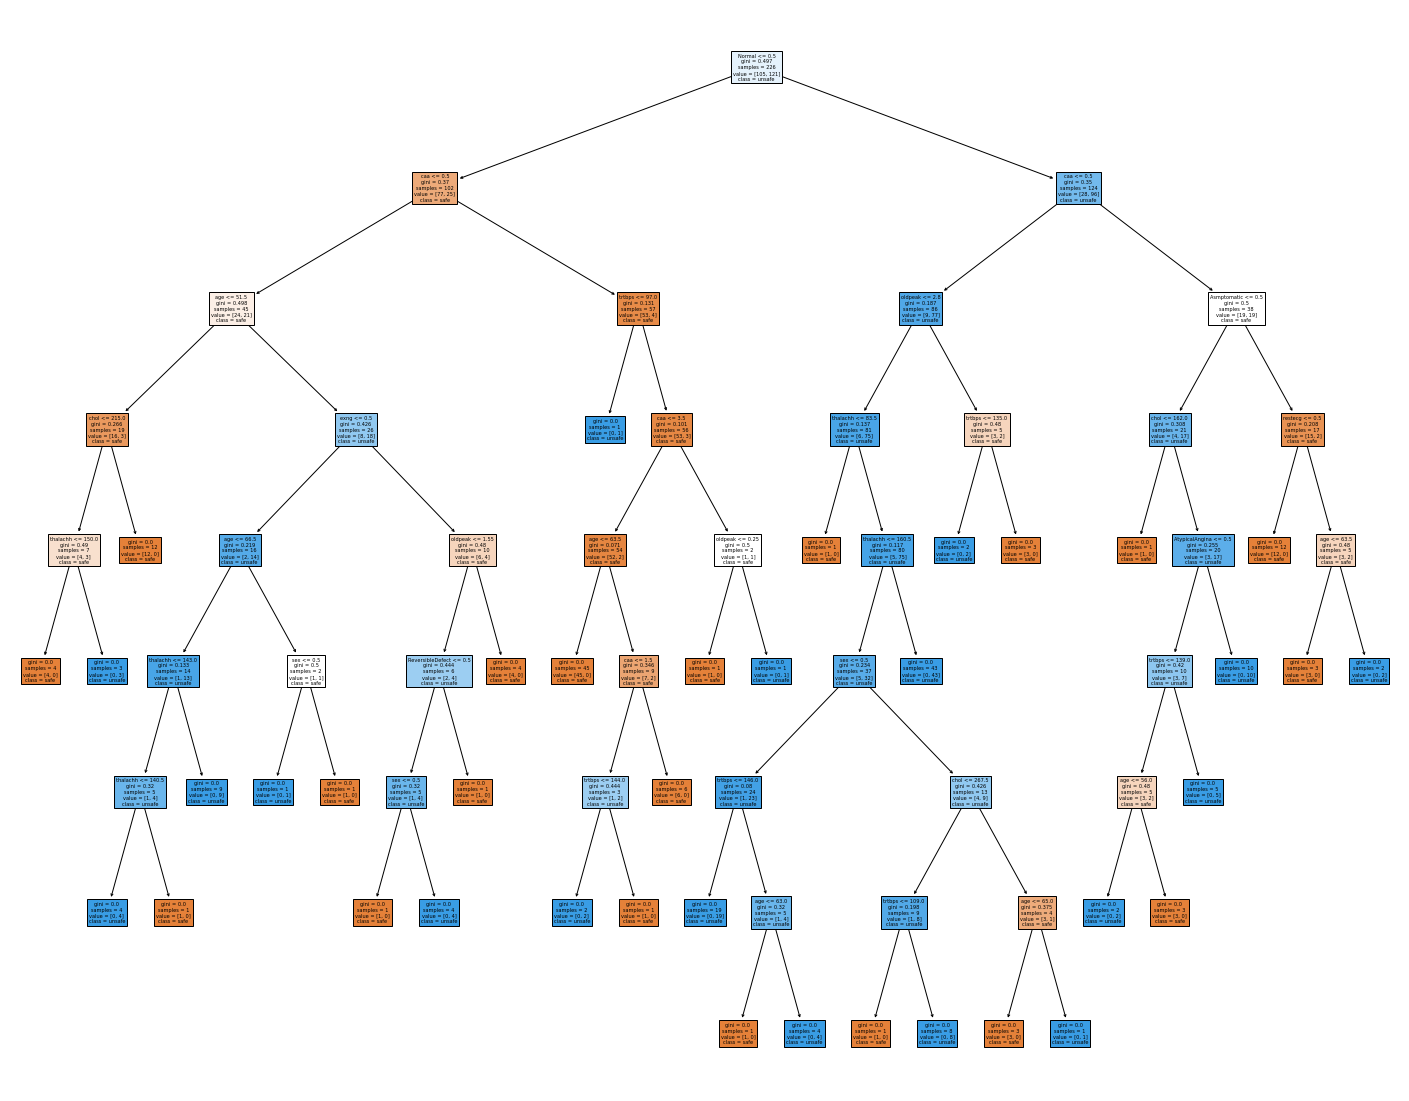

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(tree_classifier_wo_scaling, feature_names=X_feature_names, class_names = ['safe', 'unsafe'], \
           filled=True)
plt.show()

Now I want to look into post pruning of Decision trees to overcome overfitting.  

DecisionTreeClassifier.cost_complexity_pruning_path in sklearn returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

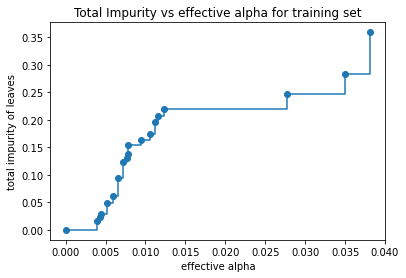

In [36]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train_wo_scale, y_train_wo_scale)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [37]:
ccp_alphas, impurities

(array([0.        , 0.00387168, 0.00424041, 0.00442478, 0.00517541,
        0.00589971, 0.00660029, 0.00716393, 0.00768191, 0.00778772,
        0.00780843, 0.00943953, 0.01061947, 0.01117839, 0.01152729,
        0.01228727, 0.02774533, 0.03498452, 0.03812601, 0.13864465]),
 array([0.        , 0.01548673, 0.02396755, 0.02839233, 0.04909397,
        0.06089338, 0.09389486, 0.12255057, 0.13023248, 0.1380202 ,
        0.15363706, 0.16307659, 0.17369606, 0.19605284, 0.20758013,
        0.2198674 , 0.24761273, 0.28259725, 0.35884928, 0.49749393]))

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [38]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_wo_scale, y_train_wo_scale)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13864465296323447


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

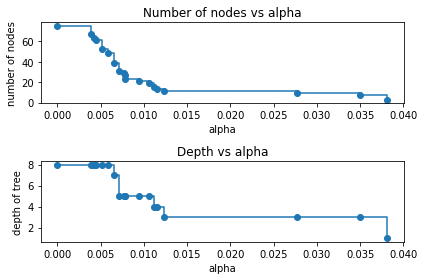

In [39]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 79% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

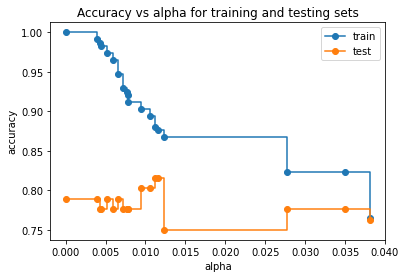

In [40]:
train_scores = [clf.score(X_train_wo_scale, y_train_wo_scale) for clf in clfs]
test_scores = [clf.score(X_test_wo_scale, y_test_wo_scale) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Looking at the graph below we observe the relationship between alpha and accuracy. The sweet spot is somewhere around 0.011 alpha

Text(0, 0.5, 'Accuracy scores')

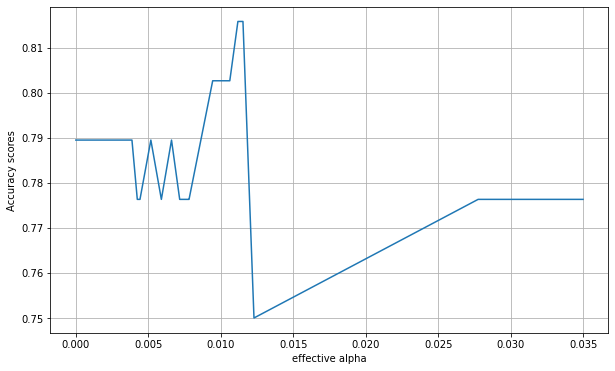

In [41]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test_wo_scale, clf.predict(X_test_wo_scale)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [42]:
ccp_alphas, acc_scores

(array([0.        , 0.00387168, 0.00424041, 0.00442478, 0.00517541,
        0.00589971, 0.00660029, 0.00716393, 0.00768191, 0.00778772,
        0.00780843, 0.00943953, 0.01061947, 0.01117839, 0.01152729,
        0.01228727, 0.02774533, 0.03498452, 0.03812601]),
 [0.7894736842105263,
  0.7894736842105263,
  0.7763157894736842,
  0.7763157894736842,
  0.7894736842105263,
  0.7763157894736842,
  0.7894736842105263,
  0.7763157894736842,
  0.7763157894736842,
  0.7763157894736842,
  0.7763157894736842,
  0.8026315789473685,
  0.8026315789473685,
  0.8157894736842105,
  0.8157894736842105,
  0.75,
  0.7763157894736842,
  0.7763157894736842,
  0.7631578947368421])

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

tree_classifier_wo_scaling = DecisionTreeClassifier(criterion = 'gini', random_state = 0, ccp_alpha=0.0112)
tree_classifier_wo_scaling.fit(X_train_wo_scale, y_train_wo_scale)

y_pred_tree_wo_scale = tree_classifier_wo_scaling.predict(X_test_wo_scale)

print("Confusion Matric:\n{}".format(confusion_matrix(y_test_wo_scale, y_pred_tree_wo_scale)))

print("Accuracy: {}".format(accuracy_score(y_test_wo_scale, y_pred_tree_wo_scale)))

Confusion Matric:
[[26  7]
 [ 7 36]]
Accuracy: 0.8157894736842105


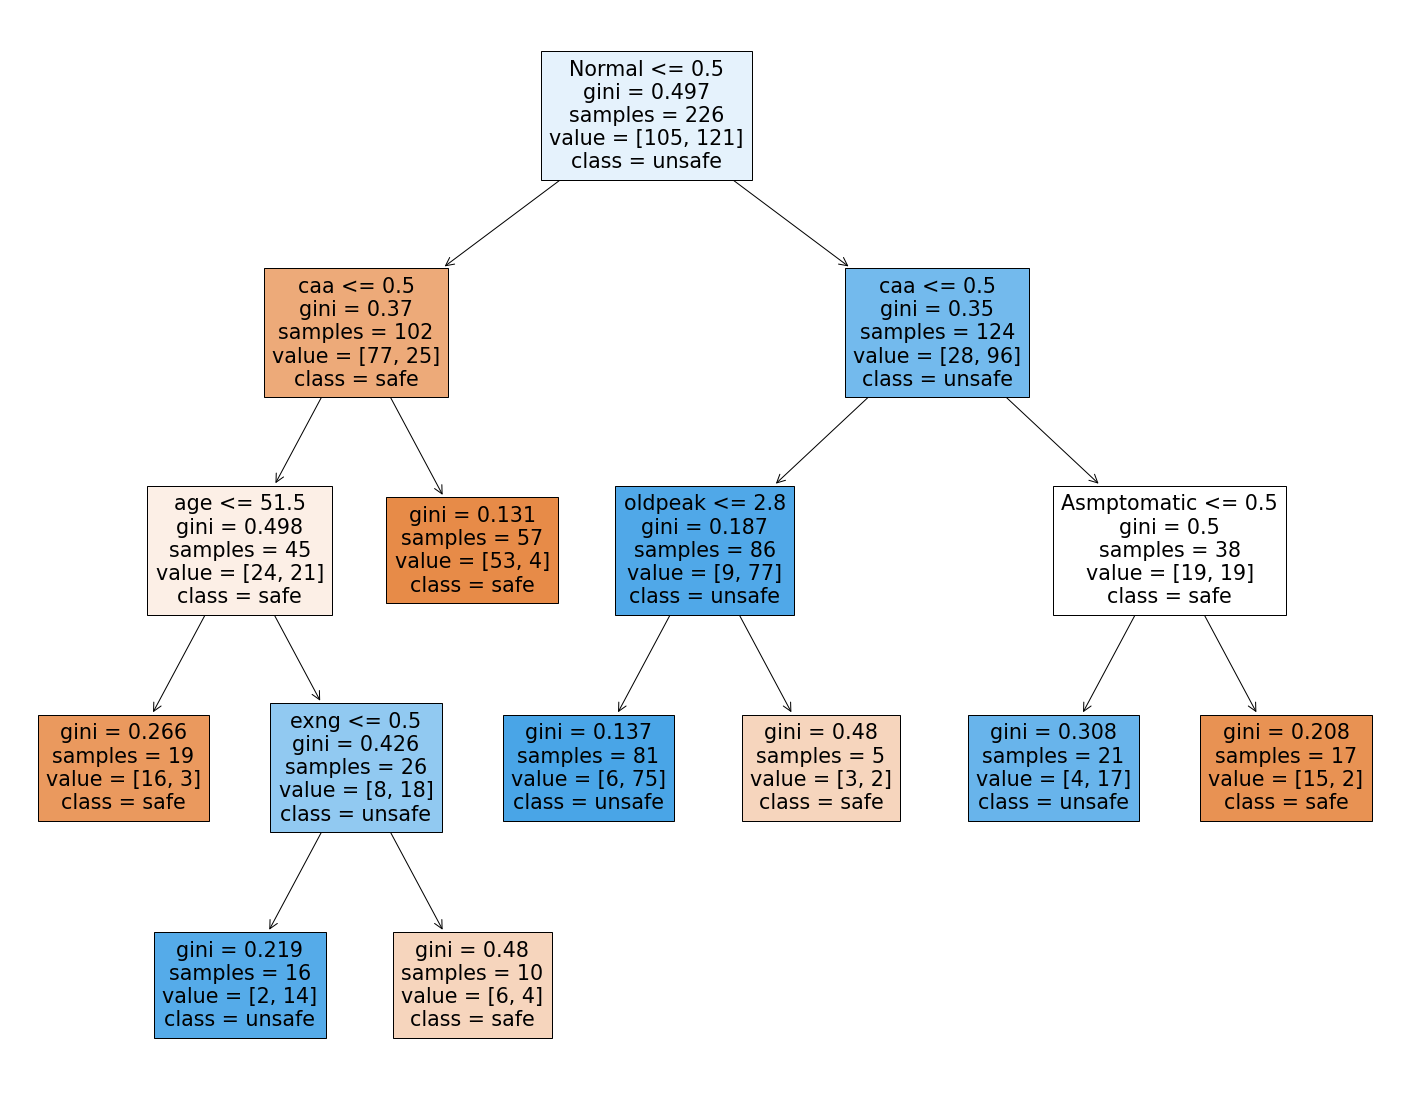

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(tree_classifier_wo_scaling, feature_names=X_feature_names, class_names = ['safe', 'unsafe'], \
           filled=True)
plt.show()

In [45]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree_classifier_wo_scaling, X_train_wo_scale, y_train_wo_scale,
                target_name="target",
                feature_names=X_feature_names,
                class_names=list(y_train_wo_scale))

viz

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/dtreeviz/trees.py)

In [49]:
X_train_wo_scale.dtype

dtype('O')

In [47]:
from sklearn.feature_selection import RFE
selector = RFE(tree_classifier_wo_scaling, step=1)
selector.fit(X_train_wo_scale, y_train_wo_scale)

print(selector.ranking_)

[ 1  8  7  6  5  4  3  1 10  9  2  1  1  1  1  1  1  1]


In [48]:
X_train_wo_scale

array([[1.0, 0.0, 0.0, ..., 206, 132, 2.4],
       [1.0, 0.0, 0.0, ..., 282, 95, 2.0],
       [0.0, 1.0, 0.0, ..., 232, 165, 1.6],
       ...,
       [0.0, 0.0, 1.0, ..., 193, 162, 1.9],
       [0.0, 1.0, 0.0, ..., 257, 156, 0.0],
       [0.0, 1.0, 0.0, ..., 224, 173, 3.2]], dtype=object)

**E. Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train_wo_scale, y_train_wo_scale)

y_pred_rf = classifier_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_score(y_true=y_test,y_pred=y_pred_rf)

[[25  8]
 [ 7 36]]


0.8026315789473685

**B. KNN**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_pred_knn = KNN.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

# Accuracy score
accuracy_score(y_test, y_pred_knn)

[[27  6]
 [ 6 37]]


0.8421052631578947

**D. SVM**

In [44]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(X_train, y_train)

y_pred_svm = classifier_svc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

# Accuracy score
accuracy_score(y_true=y_test, y_pred=y_pred_svm)

[[25  8]
 [ 6 37]]


0.8157894736842105